In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

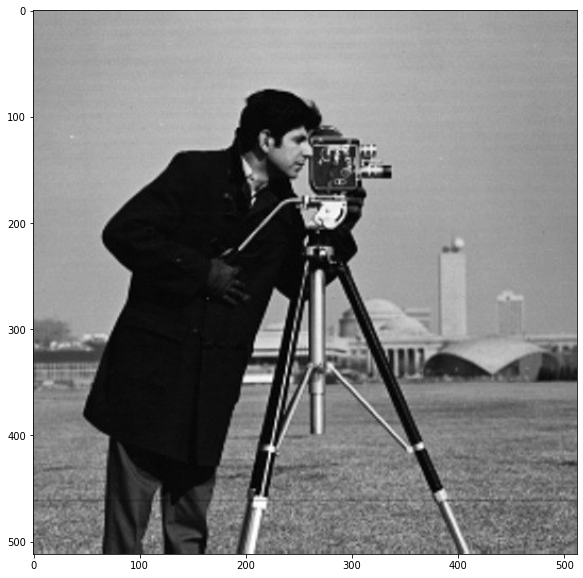

In [16]:
p=input("enter image path")
img=cv2.imread('images/'+p,0)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

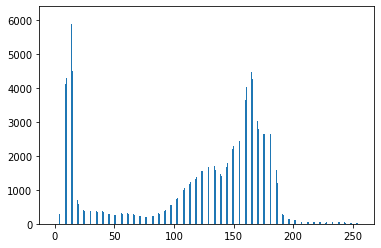

min= 0 max= 255


In [25]:
hist=np.zeros((256),dtype=np.uint64)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i,j]]+=1
plt.bar(range(256),hist,width=0.3)
plt.show()
min=img.min()
max=img.max()
size=img.shape[0]*img.shape[1]
print('min=',min,'max=',max)

In [44]:
minicv=-1
for threshold in range(min+1,max+1):
    wb=0
    varb=0
    mb=(hist[0:threshold]*np.arange(threshold)).sum()/hist[0:threshold].sum()
    for i in range(threshold):
            wb+=hist[i]
            varb+=((i-mb)**2)*hist[i]
    varb=varb/hist[0:threshold].sum()
    wb=wb/size

    wf=0
    varf=0
    mf=(hist[threshold:max+1]*np.arange(threshold,max+1)).sum()/hist[threshold:max+1].sum()
    for i in range(threshold,max):
            wf+=hist[i]
            varf+=((i-mf)**2)*hist[i]
    varf=varf/hist[threshold:max+1].sum()
    wf=wf/size

    wv=(wb*varb)+(wf*varf)
    
    if minicv==-1:
        minicv=wv
        rthreshold=threshold
    elif minicv>wv:
        minicv=wv
        rthreshold=threshold

    print(threshold,'=',wv)
print(rthreshold)

1 = 3838.627557709965
2 = 3833.315117162123
3 = 3825.9147187601225
4 = 3816.085661514832
5 = 3802.097451239194
6 = 3781.8955591378485
7 = 3746.656753935412
8 = 3673.5329480386563
9 = 3514.6820033659237
10 = 3313.0956994718795
11 = 3100.248677770966
12 = 2849.6855983101573
13 = 2559.2833968488812
14 = 2232.104441613841
15 = 1904.862073217677
16 = 1647.3198377672277
17 = 1482.7726237681434
18 = 1382.7142083900019
19 = 1327.840892926654
20 = 1287.0961270352368
21 = 1253.3089449826814
22 = 1226.138902404043
23 = 1199.1564982778661
24 = 1173.577131830333
25 = 1150.95145415983
26 = 1130.1477182427338
27 = 1110.5490193709686
28 = 1090.7843347284015
29 = 1070.815876620894
30 = 1052.4667944376574
31 = 1033.5755310664738
32 = 1016.3056629676457
33 = 999.1850193754786
34 = 981.3729360081536
35 = 964.7923245733537
36 = 948.0545957914063
37 = 932.0202726248215
38 = 915.9338163029707
39 = 900.2786363086096
40 = 884.2095856238863
41 = 868.7822270027835
42 = 855.0761087369566
43 = 842.1687543849624
44

In [48]:
mapping=np.zeros((256),dtype=np.uint8)
mapping[rthreshold:256]=255
print(mapping)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

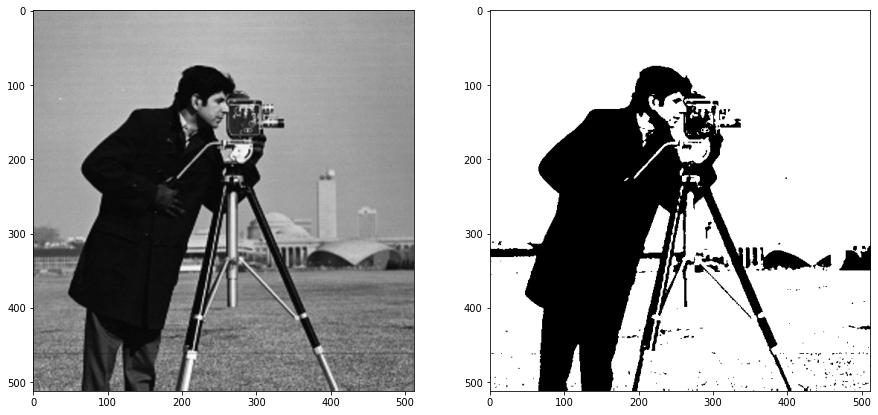

In [47]:
fb=np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        fb[i,j]=mapping[img[i,j]]
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(fb,cmap='gray')
plt.show()